**Importando bibliotecas**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [14]:
# Caminho do arquivo
caminho_arquivo = 'restaurante/restaurantev2.csv'

# Codificação detectada (substitua pelo valor detectado no passo anterior)
encoding = 'latin-1'  # Exemplo: pode ser 'ISO-8859-1' ou 'cp1252'

# Ler o arquivo com a codificação correta
base = pd.read_csv(caminho_arquivo, delimiter=';', encoding=encoding)

# Exibir as primeiras linhas do DataFrame
print(base.head())

  Exemplo Alternativo  Bar Sex/Sab fome Cliente Preço Chuva  Res       Tipo  \
0      X1         Sim  Não     Não  Sim  Alguns   RRR   Não  Sim    Francês   
1      x2         Sim  Não     Não  Sim   Cheio     R   Não  Não  Tailandês   
2      x3         Não  Sim     Não  Não  Alguns     R   Não  Não  Hamburger   
3      x4         Sim  Não     Sim  Sim   Cheio     R   Sim  Não  Tailandês   
4      X5         Sim  Não     Sim  Não   Cheio   RRR   Não  Sim    Francês   

    Tempo conc  
0    0-10  Sim  
1   30-60  Não  
2    0-10  Sim  
3  out/30  Sim  
4     >60  Não  


**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [15]:
#base2 = pd.read_csv('/content/sample_data/restaurante_correto.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [16]:
base = base.drop('Exemplo', axis=1)

In [17]:
base

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10,Sim
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60,Não
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10,Sim
3,Sim,Não,Sim,Sim,Cheio,R,Sim,Não,Tailandês,out/30,Sim
4,Sim,Não,Sim,Não,Cheio,RRR,Não,Sim,Francês,>60,Não
5,Não,Sim,Não,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Não,Sim,Não,Não,Nenhum,R,Sim,Não,Hamburger,0-10,Não
7,Não,Não,Não,Sim,Alguns,RR,Sim,Sim,Tailandês,0-10,Sim
8,Não,Sim,Sim,Não,Cheio,R,Sim,Não,Hamburger,>60,Não
9,Sim,Sim,Sim,Sim,Cheio,RRR,Não,Sim,Italiano,out/30,Não


In [18]:
base.head(3)

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,Sim,Não,Não,Sim,Alguns,RRR,Não,Sim,Francês,0-10,Sim
1,Sim,Não,Não,Sim,Cheio,R,Não,Não,Tailandês,30-60,Não
2,Não,Sim,Não,Não,Alguns,R,Não,Não,Hamburger,0-10,Sim


In [19]:
base.tail(2)

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
10,Não,Não,Não,Não,Nenhum,R,Não,Não,Tailandês,0-10,Não
11,Sim,Sim,Sim,Sim,Cheio,R,Não,Não,Hamburger,30-60,Sim


**Contando quantidade de instâncias**


In [20]:
Classificação = base.columns[-1]
np.unique(base[Classificação], return_counts=True)

(array(['Não', 'Sim'], dtype=object), array([6, 6]))

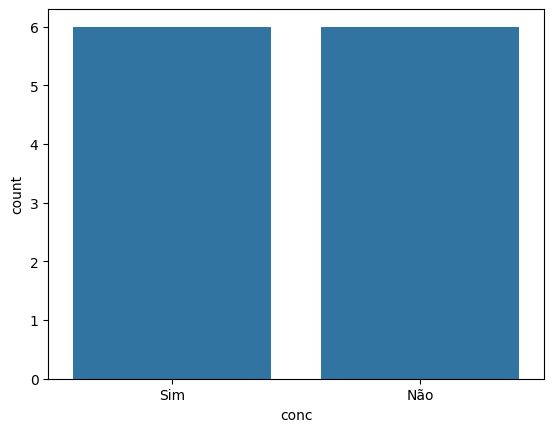

In [21]:
sns.countplot(x = base[Classificação]);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
cols_label_encode = ['Alternativo', 'Bar', 'Sex/Sab','fome', 'Cliente','Preço', 'Chuva', 'Res','Tempo']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

In [24]:
base

,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tipo,Tempo,conc
0,1,0,0,1,0,2,0,1,Francês,0,Sim
1,1,0,0,1,1,0,0,0,Tailandês,1,Não
2,0,1,0,0,0,0,0,0,Hamburger,0,Sim
3,1,0,1,1,1,0,1,0,Tailandês,3,Sim
4,1,0,1,0,1,2,0,1,Francês,2,Não
5,0,1,0,1,0,1,1,1,Italiano,0,Sim
6,0,1,0,0,2,0,1,0,Hamburger,0,Não
7,0,0,0,1,0,1,1,1,Tailandês,0,Sim
8,0,1,1,0,1,0,1,0,Hamburger,2,Não
9,1,1,1,1,1,2,0,1,Italiano,3,Não




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [25]:
len(np.unique(base['Cliente']))

3

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [27]:
cols_onehot_encode = ['Tipo']
# Inicializar o OneHotEncoder (sparse_output=False retorna um array denso)
onehot = OneHotEncoder(sparse_output=False)

# Aplicar o OneHotEncoder apenas nas colunas categóricas
df_onehot = onehot.fit_transform(base[cols_onehot_encode])

# Obter os novos nomes das colunas após a codificação
nomes_das_colunas = onehot.get_feature_names_out(cols_onehot_encode)

# Criar um DataFrame com os dados codificados e as novas colunas
df_onehot = pd.DataFrame(df_onehot, columns=nomes_das_colunas)

# Combinar as colunas codificadas com as colunas que não foram transformadas
base_encoded= pd.concat([df_onehot, base.drop(columns=cols_onehot_encode)], axis=1)

In [28]:
base_encoded

,Tipo_Francês,Tipo_Hamburger,Tipo_Italiano,Tipo_Tailandês,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tempo,conc
0,1.0,0.0,0.0,0.0,1,0,0,1,0,2,0,1,0,Sim
1,0.0,0.0,0.0,1.0,1,0,0,1,1,0,0,0,1,Não
2,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,Sim
3,0.0,0.0,0.0,1.0,1,0,1,1,1,0,1,0,3,Sim
4,1.0,0.0,0.0,0.0,1,0,1,0,1,2,0,1,2,Não
5,0.0,0.0,1.0,0.0,0,1,0,1,0,1,1,1,0,Sim
6,0.0,1.0,0.0,0.0,0,1,0,0,2,0,1,0,0,Não
7,0.0,0.0,0.0,1.0,0,0,0,1,0,1,1,1,0,Sim
8,0.0,1.0,0.0,0.0,0,1,1,0,1,0,1,0,2,Não
9,0.0,0.0,1.0,0.0,1,1,1,1,1,2,0,1,3,Não


In [29]:
base_encoded.shape

(12, 14)

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [30]:
# Supondo que a última coluna seja o target
X_prev= base_encoded.iloc[:, :-1]
y_classe = base_encoded.iloc[:, -1]

**Método de amostragem Holdout**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_prev

,Tipo_Francês,Tipo_Hamburger,Tipo_Italiano,Tipo_Tailandês,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tempo
0,1.0,0.0,0.0,0.0,1,0,0,1,0,2,0,1,0
1,0.0,0.0,0.0,1.0,1,0,0,1,1,0,0,0,1
2,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0
3,0.0,0.0,0.0,1.0,1,0,1,1,1,0,1,0,3
4,1.0,0.0,0.0,0.0,1,0,1,0,1,2,0,1,2
5,0.0,0.0,1.0,0.0,0,1,0,1,0,1,1,1,0
6,0.0,1.0,0.0,0.0,0,1,0,0,2,0,1,0,0
7,0.0,0.0,0.0,1.0,0,0,0,1,0,1,1,1,0
8,0.0,1.0,0.0,0.0,0,1,1,0,1,0,1,0,2
9,0.0,0.0,1.0,0.0,1,1,1,1,1,2,0,1,3


In [33]:
y_classe

0     Sim
1     Não
2     Sim
3     Sim
4     Não
5     Sim
6     Não
7     Sim
8     Não
9     Não
10    Não
11    Sim
Name: conc, dtype: object

In [34]:
y_classe.shape

(12,)

In [35]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 42)

In [36]:
X_treino.shape

(9, 13)

In [37]:
X_teste.shape

(3, 13)

In [38]:
X_teste

,Tipo_Francês,Tipo_Hamburger,Tipo_Italiano,Tipo_Tailandês,Alternativo,Bar,Sex/Sab,fome,Cliente,Preço,Chuva,Res,Tempo
10,0.0,0.0,0.0,1.0,0,0,0,0,2,0,0,0,0
9,0.0,0.0,1.0,0.0,1,1,1,1,1,2,0,1,3
0,1.0,0.0,0.0,0.0,1,0,0,1,0,2,0,1,0


In [39]:
y_treino

8     Não
5     Sim
2     Sim
1     Não
11    Sim
4     Não
7     Sim
3     Sim
6     Não
Name: conc, dtype: object

In [40]:
y_teste

10    Não
9     Não
0     Sim
Name: conc, dtype: object

In [41]:
import pickle

In [42]:
with open('Restaurante.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)